In [1]:
from cobaya.yaml import yaml_load_file
from cobaya.model import get_model
import matplotlib.pyplot as plt
import numpy as np

In [2]:
info_from_yaml = yaml_load_file("/home/fverdian/cobaya/FRA-params/pbj_boss_class.yaml")
info_from_yaml['likelihood']['pbjboss']['python_path']='/home/fverdian/cobaya/pbj4cobaya/'
info_from_yaml['likelihood']['pbjboss']['pbj_path']='/home/fverdian/cobaya/pbj-multiz/'
model_pbj = get_model(info_from_yaml)

[model] *WARNING* Ignored blocks/options: ['sampler', 'output']
[classy] `classy` module loaded successfully from /home/fverdian/anaconda3/lib/python3.10/site-packages/classy-3.2.0-py3.10-linux-x86_64.egg
[info] The linear power spectrum will be computed with cobaya
[info] Infrared resummation: True, kind: EH
[info] Alcock-Paczynski distortions: True
[0.38 0.38 0.61 0.61] {'h': 0.676, 'Obh2': 0.022, 'Och2': 0.119, 'Mnu': 0.06, 'w0': 0, 'wa': 0, 'Ok': 0}
[pbjboss] Observables: ['P0', 'P2']
[pbjboss] Using model_varied_cosmology_analytic_marg_multiz as likelihood model function
Setting fx functions
[pbjboss] Analyzing boss at redshifts [0.38 0.38 0.61 0.61]
[pbjboss] Analytically marginalizing on ['bG3', 'c0', 'c2', 'aP', 'e0k2', 'e2k2']


In [20]:
pointspec={'b1_sgc_z3': 2., 'omega_b': 0.022, 'b1_sgc_z1': 2., 'b1_ngc_z3': 2., 'h': 0.7, 'b1_ngc_z1': 2., 'omega_cdm': 0.12, 'n_s': 0.96, 'logA': 3.044, 'b2': 0.0, 'bG2': 0.0, 'Mnu': 0.0, 'z': 0.5, 'Tcmb': 2.7255}
# CLASS
logposterior = model_pbj.logposterior(pointspec, as_dict=True)
# Cls_class = model_class.provider.get_Cl(ell_factor=True)
PL_class = model_pbj.provider.get_Pk_interpolator().P(0.61,pbjObj.kPE[pbjObj.IdxP[0]])
print(PL_class)

[42320.85183084 37624.39902716 31145.06846272 25672.05174631
 21981.69740995 19714.82053012 18128.50795198 16577.57474787
 14780.95973188 12846.09451576 11067.56611841  9684.39976292
  8758.03936432  8185.86957241  7783.32855743  7373.18195516
  6862.22288027  6264.03070383  5664.14340706  5151.60213814
  4771.86129672  4516.01322991  4336.50280806  4176.36948636
  3990.76686492  3767.12819561  3524.74183175  3294.58298401
  3099.63933734  2947.94251631  2832.92866279  2738.06730736
  2645.21474647  2543.97052871  2433.54204475  2320.35322273
  2213.79700323  2121.29781413]


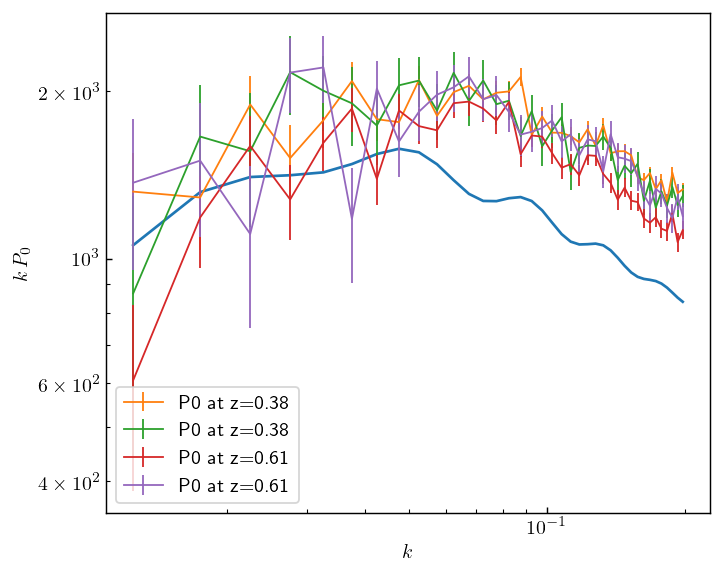

In [21]:
pbjObj = model_pbj.likelihood["pbjboss"].pbjobj
colors=['blue', 'green', 'y','m']
z_bins = pbjObj.z_bins
kCut = pbjObj.kPE[pbjObj.IdxP[0]]
%matplotlib inline
plt.figure(figsize=(6,5),dpi=130)

plt.loglog(kCut, kCut*PL_class*2)

for i in range(len(z_bins)):
    var = np.diag(pbjObj.Cov[i][:len(kCut),:len(kCut)])
    plt.errorbar(kCut, kCut*pbjObj.CutDataVecs[i][0], yerr=kCut*np.sqrt(var), label=f'P0 at z={z_bins[i]}', linewidth=1.)
plt.xscale('log')
plt.xlabel(r'$k$'),plt.ylabel(r'$k\, P_0$')
plt.legend()
plt.show()